In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.fft import ifft, fft, fftfreq
from statsmodels.tsa.stattools import acf

from neurodsp.spectral import compute_spectrum
from timescales.sim import sim_spikes_synaptic

In [2]:
np.random.seed(0)
n_seconds = 1000
fs = 1000
tau = .025

probs, _ = sim_spikes_synaptic(n_seconds, fs, tau)

In [3]:
# compute PSD
psd = np.abs(fft(probs).real) ** 2
freqs = fftfreq(len(psd), 1/fs)

freqs = freqs[:len(psd)//2]
psd = psd[:len(psd)//2]

# ifft to get acf
corrs_ifft = ifft(psd).real[:100]
lags = np.arange(0, (2 * len(corrs_ifft)), 2)

# directly compute acf
corrs = acf(probs, nlags=len(probs))
corrs = corrs[:200]

corrs_ifft = (corrs_ifft - np.min(corrs_ifft)) / np.ptp(corrs_ifft)

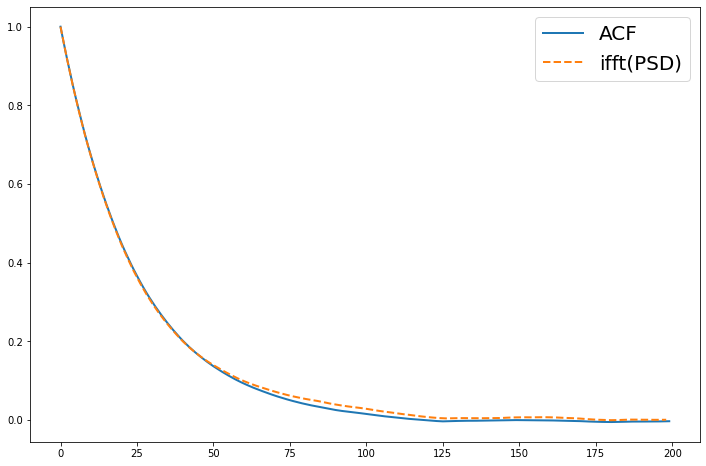

In [4]:
plt.figure(figsize=(12, 8))

plt.plot(corrs, label='ACF', lw=2)
plt.plot(lags, corrs_ifft, label='ifft(PSD)', ls='--', lw=2)

plt.legend(fontsize=20)
#plt.savefig('ifft_v_acf.png')